<a href="https://colab.research.google.com/github/BillWorstell/derenzo_phantom/blob/master/iDerenzoPytomography_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install required packages

Modify the path below to where you saved the files:

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/pytomography_tutorial_data/simind_tutorial/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Install pytomography

See https://pytomography.readthedocs.io/en/latest/usage.html

and in particular https://pytomography.readthedocs.io/en/latest/notebooks/t_fbp.html

Modified to run from Google Colab: https://colab.research.google.com/

Data stored on Google Drive in path = '/content/drive/MyDrive/pytomography_tutorial_data/simind_tutorial/'

May require restart after first run

Tested with V100 GPU on Colab

In [2]:
#!pip install uvicorn
#!pip install kaleido
#!pip install fastapi
#!pip install monai
#!pip install python-multipart
#!pip install matplotlib
#!pip install mpl_toolkits

Get pytomography verssion from github

In [3]:
!pip install 'git+https://github.com/BillWorstell/pytomography.git'

  Cloning https://github.com/BillWorstell/pytomography.git to /tmp/pip-req-build-4aniz1yd
  Running command git clone --filter=blob:none --quiet https://github.com/BillWorstell/pytomography.git /tmp/pip-req-build-4aniz1yd
  Resolved https://github.com/BillWorstell/pytomography.git to commit 19dee22bf1f93e6e7d6fa0ab2a66011dcd7171ad
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached scipy-1.12.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (38.4 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida


https://vivekg.dev/DiffDRR/

install DiffDRR from PyPI:

In [4]:
!pip install diffdrr

##Import os, sys, and pytorch3d

In [5]:
import os
import sys
import torch
need_pytorch3d=False
try:
    import pytorch3d
except ModuleNotFoundError:
    need_pytorch3d=True
if need_pytorch3d:
    if torch.__version__.startswith("2.1.") and sys.platform.startswith("linux"):
        # We try to install PyTorch3D via a released wheel.
        pyt_version_str=torch.__version__.split("+")[0].replace(".", "")
        version_str="".join([
            f"py3{sys.version_info.minor}_cu",
            torch.version.cuda.replace(".",""),
            f"_pyt{pyt_version_str}"
        ])
        !pip install fvcore iopath
        !pip install --no-index --no-cache-dir pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/{version_str}/download.html
    else:
        # We try to install PyTorch3D from source.
        !pip install 'git+https://github.com/facebookresearch/pytorch3d.git@stable'



Install icecream for debug printing

https://github.com/gruns/icecream

In [6]:
!pip install icecream
from icecream import ic

In [7]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpp

##Get DiffDRR version from github

Use the version of DiffDRR posted on github

Git clone from github publib open source code to colab working directory

See https://stackoverflow.com/questions/50850216/google-colab-install-from-github-glrm

In [8]:
!pip install 'git+https://github.com/BillWorstell/DiffDRR.git'

  Cloning https://github.com/BillWorstell/DiffDRR.git to /tmp/pip-req-build-n10arv4w
  Running command git clone --filter=blob:none --quiet https://github.com/BillWorstell/DiffDRR.git /tmp/pip-req-build-n10arv4w
  Resolved https://github.com/BillWorstell/DiffDRR.git to commit 9f19b9232b78843302f05be08f4751a628761669
  Preparing metadata (setup.py) ... done


In [9]:
import torch

from diffdrr.data import load_example_ct
from diffdrr.drr import DRR
from diffdrr.visualization import plot_drr

##Get derenzo_phantom version from github

In [10]:
!rm /content/derenzo_phantom -rf
!git clone https://github.com/Billworstell/derenzo_phantom.git

Cloning into 'derenzo_phantom'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 160 (delta 42), reused 90 (delta 42), pack-reused 70
Receiving objects: 100% (160/160), 12.23 MiB | 21.81 MiB/s, done.
Resolving deltas: 100% (75/75), done.


look around

In [11]:
!pwd
!ls -ltr

# importing module
import sys

# printing all directories for
# interpreter to search
sys.path.append('/content/derenzo_phantom/')

!ls -ltr /content
!ls -ltr /content/derenzo_phantom/
!ls -ltr /content/derenzo_phantom/derenzo_log.py

/content
total 12
drwxr-xr-x 1 root root 4096 Jan 25 14:23 sample_data
drwx------ 5 root root 4096 Jan 26 22:50 drive
drwxr-xr-x 3 root root 4096 Jan 26 23:08 derenzo_phantom
total 12
drwxr-xr-x 1 root root 4096 Jan 25 14:23 sample_data
drwx------ 5 root root 4096 Jan 26 22:50 drive
drwxr-xr-x 3 root root 4096 Jan 26 23:08 derenzo_phantom
total 11956
-rw-r--r-- 1 root root 1313334 Jan 26 23:08 'DeRenzo Pytomography.pdf'
-rw-r--r-- 1 root root 1545339 Jan 26 23:08 'DeRenzo iCheckRotations ipynb.pdf'
-rw-r--r-- 1 root root     303 Jan 26 23:08  README.md
-rw-r--r-- 1 root root 1803321 Jan 26 23:08  DerenzoPytomography.ipynb
-rw-r--r-- 1 root root    4270 Jan 26 23:08  derenzo_log.py
-rw-r--r-- 1 root root 1296108 Jan 26 23:08  iCheckDRRs.ipynb
-rw-r--r-- 1 root root 2680111 Jan 26 23:08  iCheckRotations.ipynb
-rw-r--r-- 1 root root  718092 Jan 26 23:08  iCheckSinograms.ipynb
-rw-r--r-- 1 root root 1075983 Jan 26 23:08  iPytorchPhantom.ipynb
-rw-r--r-- 1 root root  888138 Jan 26 23:08  ip

import DerenzoPhantom

In [12]:
from phantom import DerenzoPhantom

In [13]:
# import math for rotation Matrix multiplication
import math as m

def Rx(theta):
  return np.matrix([[ 1, 0           , 0           ],
                   [ 0, m.cos(theta),-m.sin(theta)],
                   [ 0, m.sin(theta), m.cos(theta)]])

def Ry(theta):
  return np.matrix([[ m.cos(theta), 0, m.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-m.sin(theta), 0, m.cos(theta)]])

def Rz(theta):
  return np.matrix([[ m.cos(theta), -m.sin(theta), 0 ],
                   [ m.sin(theta), m.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])



#Specify 3D Phantom Geometry

with null Rotation=[0,0,0], Translation=[2*radius,0,0]

---



Use reference phantom, but offset along X axis

ic| SectorMask.sum(): 24658.0
ic| self.mask.sum(): 24658.0
ic| SectorMask.sum(): 13852.0
ic| self.mask.sum(): 38510.0
ic| SectorMask.sum(): 19282.0
ic| self.mask.sum(): 57792.0
ic| SectorMask.sum(): 20540.0
ic| self.mask.sum(): 78332.0
ic| SectorMask.sum(): 17322.0
ic| self.mask.sum(): 95654.0
ic| SectorMask.sum(): 18491.0
ic| self.mask.sum(): 114145.0


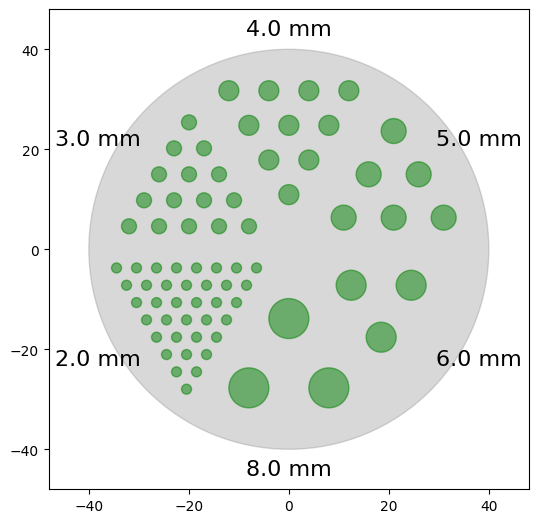

In [14]:
radius = 40.0
well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)
#well_seps = (10.,15.,15.,15.,15.,15.)
test_phantom = DerenzoPhantom(radius, well_seps, )
test_phantom.show()

Generate Mask for reference phantom

ic| myMask.shape: (1024, 1024)
ic| myMask.sum(): 114145.0


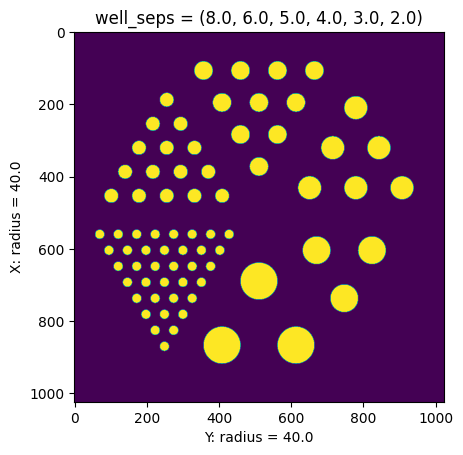

In [15]:
myMask=test_phantom.mask.reshape(1024,1024)
ic(myMask.shape)
ic(myMask.sum())
#plt.imshow(myMask)
plt.imshow(np.flipud(myMask))

plt.title('well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)')
plt.xlabel(f'Y: radius = {radius}')
plt.ylabel(f'X: radius = {radius}')
plt.show()

ic| myMask.shape: (1024, 1024)
ic| myMask.sum(): 114145.0


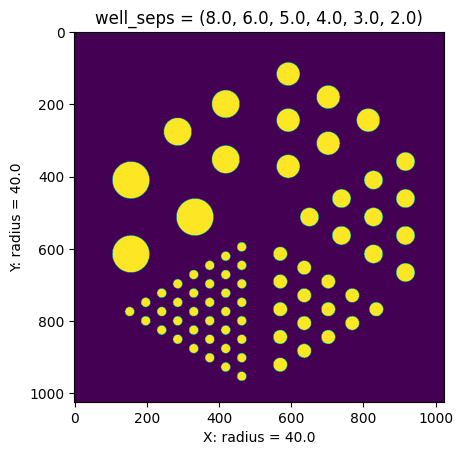

In [16]:
myMask=test_phantom.mask.reshape(1024,1024)
ic(myMask.shape)
ic(myMask.sum())
#plt.imshow(myMask)
plt.imshow(np.flipud(myMask.T))

plt.title('well_seps = (8.0, 6.0, 5.0, 4.0, 3.0, 2.0)')
plt.xlabel(f'X: radius = {radius}')
plt.ylabel(f'Y: radius = {radius}')
plt.show()

make meshgrid from volume and spacing

In [17]:
#volume, spacing = load_example_ct()
volume=np.zeros([256,256,128])
spacing=[0.703125, 0.703125, 2.5]
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx, by, bz)
ic(volume.shape)
ic(spacing)

ic| bx: tensor(90.), by: tensor(90.), bz: tensor(160.)
ic| volume.shape: (256, 256, 128)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

Get lab frame coordinates for voxels in volume

In [18]:
xlinspace=np.linspace(-256*spacing[0], 256*spacing[0], 512)
ylinspace=np.linspace(-256*spacing[1], 256*spacing[1], 512)
zlinspace=np.linspace(-48*spacing[2], 48*spacing[2], 96)
xgrid,ygrid,zgrid = np.meshgrid(xlinspace, ylinspace,zlinspace)
xgrid=xgrid.flatten()
ygrid=ygrid.flatten()
zgrid=zgrid.flatten()

Define rotateImage for psi rotation of phantom, using scipy ndimage

In [19]:
from scipy import ndimage

def rotateImage(img, angle, pivot):
    padX = [img.shape[1] - pivot[0], pivot[0]]
    padY = [img.shape[0] - pivot[1], pivot[1]]
    imgP = np.pad(img, [padY, padX], 'constant')
    imgR = ndimage.rotate(imgP, angle, reshape=False)
    return imgR[padY[0] : -padY[1], padX[0] : -padX[1]]


In [20]:
# [2,1] * radius X TRANSLATION AND NULL ROTATION
#
PhantomHalfZ=radius
ic(PhantomHalfZ)
#TranslatePhantom=[30.,40.,50.]
TranslateX=radius
TranslateY=0.5*radius
TranslatePhantom=[TranslateX,TranslateY,0.]
ic(TranslatePhantom)

# specify Euler angles for establishing Phantom orientation in lab frame
psi = 0.
#psi=np.pi/4.
#phi=np.pi/2.
phi=0.0
#theta=np.pi/2.
theta=0.0

psiDeg=psi*(180./np.pi)
thetaDeg=theta*(180./np.pi)
phiDeg=phi*(180./np.pi)

RotatePhantom=[phi,theta,psi]
ic(RotatePhantom)

spacingPhantom=[(2.*radius)/1024.,2.*radius/1024.,2.*PhantomHalfZ]
ic(spacingPhantom)

ic| PhantomHalfZ: 40.0
ic| TranslatePhantom: [40.0, 20.0, 0.0]
ic| RotatePhantom: [0.0, 0.0, 0.0]
ic| spacingPhantom: [0.078125, 0.078125, 80.0]


[0.078125, 0.078125, 80.0]

Position phantom in lab frame by first rotating by psi about initial z, then by theta about y', then by phi about z''

In [21]:
R_Invert=  Ry(-theta) * Rz(-phi)
print(np.round(R_Invert, decimals=2))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [22]:
# Transform from lab frame 'grid' to phantom reference frame through a series of transformations
#
# Invert translation from Lab System origin to Phantom System origin
ic(radius)
ic(PhantomHalfZ)
ic(TranslatePhantom)
xp1 = xgrid-TranslatePhantom[0]
yp1 = ygrid-TranslatePhantom[1]
zp1 = zgrid-TranslatePhantom[2]
ic(xp1.shape)

v1 = np.array([xp1,yp1,zp1])
v2 = R_Invert * v1

xp2=v2[0,:]
yp2=v2[1,:]
zp2=v2[2,:]

xp3=np.squeeze(np.asarray(xp2))
yp3=np.squeeze(np.asarray(yp2))
zp3=np.squeeze(np.asarray(zp2))
ic(xp1)
ic(xp2)
ic(xp3)

ic(xp1.size)
ic(xp1.shape)
ic(xp2.shape)
ic(xp3.shape)

ixPh=np.floor(((xp3+radius)/spacingPhantom[0])).astype(int)
ic(ixPh.max())
ic(ixPh.min())
iyPh=np.floor(((yp3+radius)/spacingPhantom[1])).astype(int)
ic(iyPh.max())
ic(iyPh.min())
#izPh=np.floor(((zp3+PhantomHalfZ)/spacingPhantom[2])).astype(int)
#ic(izPh.max())
#ic(izPh.min())

ic| radius: 40.0
ic| PhantomHalfZ: 40.0
ic| TranslatePhantom: [40.0, 20.0, 0.0]
ic| xp1.shape: (25165824,)
ic| xp1: array([-220., -220., -220., ...,  140.,  140.,  140.])
ic| xp2: matrix([[-220., -220., -220., ...,  140.,  140.,  140.]])
ic| xp3: array([-220., -220., -220., ...,  140.,  140.,  140.])
ic| xp1.size: 25165824
ic| xp1.shape: (25165824,)
ic| xp2.shape: (1, 25165824)
ic| xp3.shape: (25165824,)
ic| ixPh.max(): 2304
ic| ixPh.min(): -2304
ic| iyPh.max(): 2560
ic| iyPh.min(): -2048


-2048

Insert test reference phantom into source volume

In [23]:
# Input test phantom reference mask and rotate by psi
phantomMask=test_phantom.mask.reshape(1024,1024)
pivot=[511,511]
phantomMaskR=rotateImage(phantomMask, psiDeg, pivot)

volumeShape=[512, 512, 96]
phantomShape=[1024,1024]
ic(volumeShape)
volume=np.zeros(volumeShape).flatten()
ic(volume.shape)

ic(min(zp1))
ic(max(zp1))
ic(min(zp3))
ic(max(zp3))
validX=(ixPh>=0) & (ixPh<phantomShape[0])
validY=(iyPh>=0) & (iyPh<phantomShape[1])
validZ=(zp3>=-PhantomHalfZ) & (zp3<=PhantomHalfZ)
valid=(validX & validY & validZ).flatten()
ic(valid.shape)
ixPh2=ixPh[valid]
iyPh2=iyPh[valid]
Test=volume[valid]
ic(Test.shape)

volume=volume*0.
volume[valid]=phantomMaskR[ixPh2,iyPh2]

volume=volume.reshape(volumeShape)
PVCvolume=np.zeros(volume.shape,dtype=np.float32)
PVCvolume[1:511, 1:511, :] += volume[0:510, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[0:510, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[1:511, 2:512, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 0:510, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 1:511, :] / 9.
PVCvolume[1:511, 1:511, :] += volume[2:512, 2:512, :] / 9.

ic| volumeShape: [512, 512, 96]
ic| volume.shape: (25165824,)
ic| min(zp1): -120.0
ic| max(zp1): 120.0
ic| min(zp3): -120.0
ic| max(zp3): 120.0
ic| valid.shape: (25165824,)
ic| Test.shape: (412224,)


ThisVolume=torch.from_numpy(volume)

In [24]:
ThisVolume=torch.from_numpy(volume).unsqueeze(dim=0)
ic(ThisVolume.shape)

ic| ThisVolume.shape: torch.Size([1, 512, 512, 96])


torch.Size([1, 512, 512, 96])

Display Phantom projections within volume

ic| PVCvolume.shape: (512, 512, 96)
ic| SumX.shape: (512, 96)
ic| SumY.shape: (512, 96)
ic| SumZ.shape: (512, 512)


Text(0.5, 1.0, 'T= [40.0, 20.0, 0.0] R= [psi=0.0, theta=0.0, phi=0.0] ')

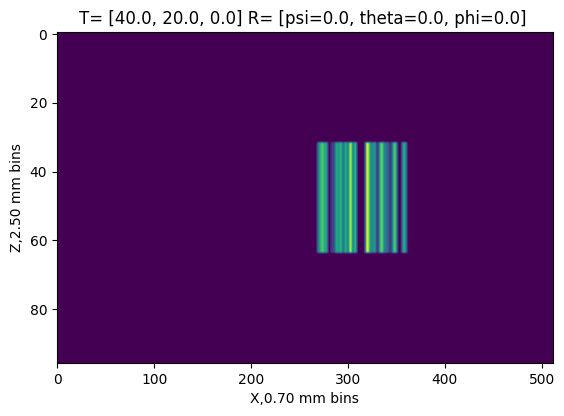

In [25]:
ic(PVCvolume.shape)
SumX=PVCvolume.sum(0)
SumY=PVCvolume.sum(1)
SumZ=PVCvolume.sum(2)
ic(SumX.shape)
ic(SumY.shape)
ic(SumZ.shape)

ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumX.T),aspect=ThisAspect)
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [psi={psiDeg:.1f}, ' + f'theta={thetaDeg:.1f}, ' + f'phi={phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [40.0, 20.0, 0.0] R= [psi=0.0, theta=0.0, phi=0.0] ')

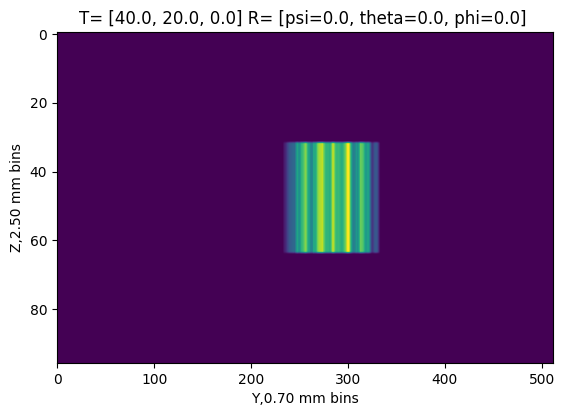

In [26]:
ThisAspect=spacing[2]/spacing[0]
plt.imshow(np.flipud(SumY.T),aspect=ThisAspect)
plt.xlabel(f'Y,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Z,{spacing[2]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [psi={psiDeg:.1f}, ' + f'theta={thetaDeg:.1f}, ' + f'phi={phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

Text(0.5, 1.0, 'T= [40.0, 20.0, 0.0] R= [psi=0.0, theta=0.0, phi=0.0] ')

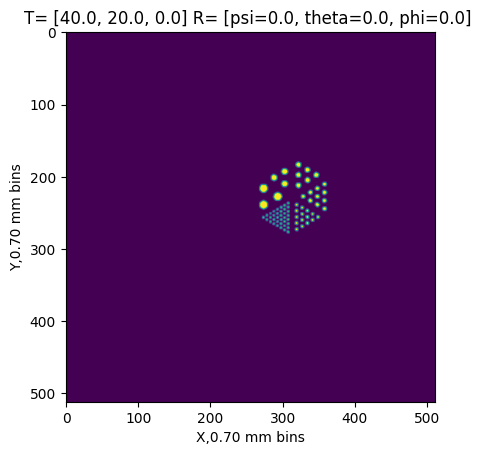

In [27]:
plt.imshow(np.flipud(SumZ))
plt.xlabel(f'X,{spacing[0]:0.2f} mm bins')
plt.ylabel(f'Y,{spacing[1]:0.2f} mm bins')
TranslateString=f'T= [{TranslatePhantom[0]:.1f}, ' + f'{TranslatePhantom[1]:.1f}, ' + f'{TranslatePhantom[2]:.1f}] '
RotateString=f'R= [psi={psiDeg:.1f}, ' + f'theta={thetaDeg:.1f}, ' + f'phi={phiDeg:.1f}] '
plt.title(TranslateString + RotateString)

##Make DRRs for PVCvolume

In [28]:
volume=PVCvolume

Get characteristics of volume

In [29]:
ic(volume.dtype)
ic(volume.shape)
ic(volume.size)

ic| volume.dtype: dtype('float32')
ic| volume.shape: (512, 512, 96)
ic| volume.size: 25165824


25165824

Install matplotlib and numpy

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import cm

!pip install icecream
from icecream import ic

Input from .xlsx file

MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.fix

From Google drive

In [31]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/SPECTGeometry/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
!ls -ltr /content/drive/MyDrive/SPECTGeometry/

total 1223
-rw------- 1 root root 461819 Dec 19 14:27 MDSL.excel80M10RFR.cut-plate.007.150roi.2.30pin.105ellipse.fix.xlsx
-rw------- 1 root root 790185 Dec 22 19:19 MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx


Install openpyxl using pip

In [33]:
pip install openpyxl

https://openpyxl.readthedocs.io/en/stable/tutorial.html#loading-from-a-file

In [34]:
from openpyxl import load_workbook
wb = load_workbook(filename = '/content/drive/MyDrive/SPECTGeometry/MDSL.excel80M10RFR.cut-plate.008.150roi.2.30pin.105ellipse.xlsx',data_only=True)

loop through worksheets

In [35]:
for sheet in wb:
...     print(sheet.title)

Main
Coordinates
MDSL cloud import
Theta
Values
Design Table


Go to Coordinates Worksheet

In [36]:
wb.active = 1
print(wb.active.title)
ws = wb.active

Coordinates


Length of Collimator

In [37]:
ic(ws.cell(2,7).value)
lcoll=np.zeros(80)
for i in range(3,83):
  lcoll[i-3]=(ws.cell(i,7).value)

ic| ws.cell(2,7).value: 'length of collimator'


Choose vsdr = 5 * length of collimator, so by similar triangles

(2*5*lcoll)=source to virtual detector, or 10X

source to virtual detector is 10X size of actual detector

Size of detector at end of collimator is ~50mm

This implies dx * NX = 10 * 50mm ~ 500mm

dx ~ 500/256 ~2mm

    height=256,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=1.0,  # Pixel spacing (in mm)


In [38]:
vsdr=5.*lcoll

alpha: Azimuthal angle (radians)

In [39]:
ic(ws.cell(2,22).value)
alpha=np.zeros(80)
for i in range(3,83):
  alpha[i-3]=(ws.cell(i,22).value)

ic| ws.cell(2,22).value: 'pinhole azimuth (radians)'


beta = altitude (radians)

In [40]:
ic(ws.cell(2,23).value)
beta=np.zeros(80)
for i in range(3,83):
  beta[i-3]=(ws.cell(i,23).value)

ic| ws.cell(2,23).value: 'pinhole elevation (radians)'


DRR Generation

DiffDRR is implemented as a custom PyTorch module.

All raytracing operations have been formulated in a vectorized function, enabling use of PyTorch's GPU support and autograd. This also means that DRR generation is available as a layer in deep learning frameworks.

Display FOV for camera [0]

ic| bx0.dtype: torch.float32
ic| bx.dtype: torch.float32
ic| rotations0: tensor([[3.1416, 0.0000, 1.5708]], device='cuda:0')
ic| rotations0.dtype: torch.float32
ic| rotations: tensor([[ 0.2488, -0.2403,  1.5708]], device='cuda:0')
ic| rotations.dtype: torch.float32
ic| img.shape: torch.Size([1, 1, 256, 256])
ic| imgMax: tensor(23.0273, device='cuda:0')


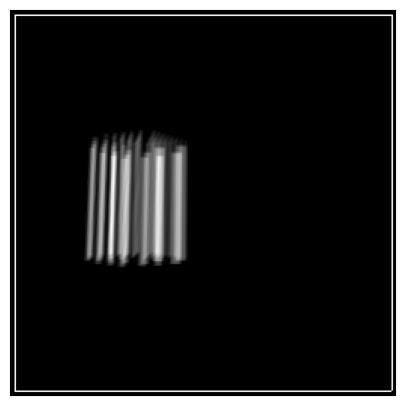

In [41]:
#| cuda
# Read in the volume and get the isocenter
#volume, spacing = load_example_ct()
bx0, by0, bz0 = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx0.dtype)
bx, by, bz = torch.tensor(volume.shape) * torch.tensor(spacing) / 2
ic(bx.dtype)
# Initialize the DRR module for generating synthetic X-rays
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[0]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=256,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=2.0,  # Pixel spacing (in mm)
).to(device)

# Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
rotations0 = torch.tensor([[torch.pi, 0.0, torch.pi / 2]], device=device)
ic(rotations0)
ic(rotations0.dtype)
rotations = torch.tensor([[float(alpha[0]), float(beta[0]), torch.pi / 2]], device=device)
ic(rotations)
ic(rotations.dtype)
#translations0 = torch.tensor([[bx0, by0, bz0]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
#img = drr0(rotations0, translations0, parameterization="euler_angles", convention="ZYX")
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
ic(img.shape)
imgMax=img.max()
img[0,0,3:253,3] = imgMax
img[0,0,3:253,253] = imgMax
img[0,0,3,3:253] = imgMax
img[0,0,253,3:253] = imgMax
ic(imgMax)
plot_drr(img, ticks=False)
plt.show()

Adapted from diffdrr/visualization.py/plot_drr

Display FOV for camera [10]

ic| rotations: tensor([[ 2.6307, -0.3508,  1.5708]], device='cuda:0')
ic| rotations.dtype: torch.float32
ic| img.shape: torch.Size([1, 1, 256, 256])
ic| imgMax: tensor(18.4516, device='cuda:0')


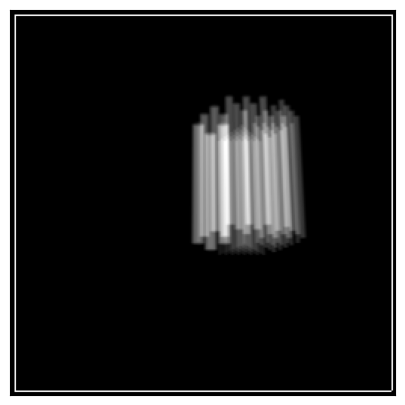

In [42]:
rotations = torch.tensor([[float(alpha[10]), float(beta[10]), torch.pi / 2]], device=device)
ic(rotations)
ic(rotations.dtype)
#translations0 = torch.tensor([[bx0, by0, bz0]], device=device)
translations = torch.tensor([[bx, by, bz]], device=device)
#img = drr0(rotations0, translations0, parameterization="euler_angles", convention="ZYX")
img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
ic(img.shape)
imgMax=img.max()
img[0,0,3:253,3] = imgMax
img[0,0,3:253,253] = imgMax
img[0,0,3,3:253] = imgMax
img[0,0,253,3:253] = imgMax
ic(imgMax)
plot_drr(img, ticks=False)
plt.show()

Display FOV Series for cameras [0:19]

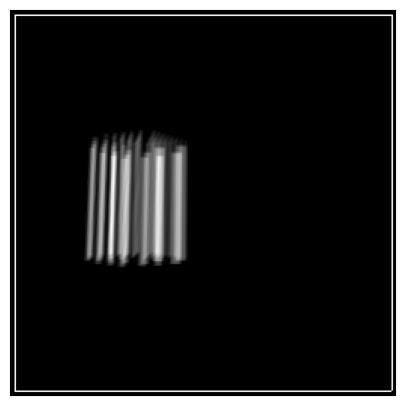

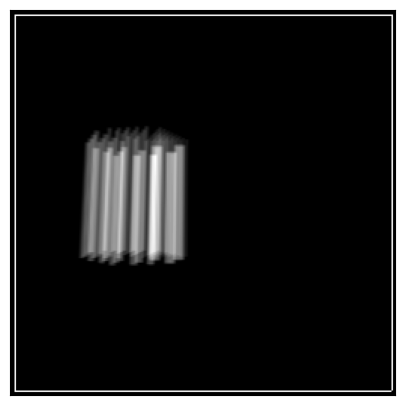

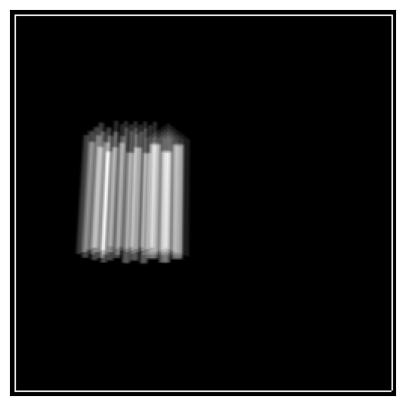

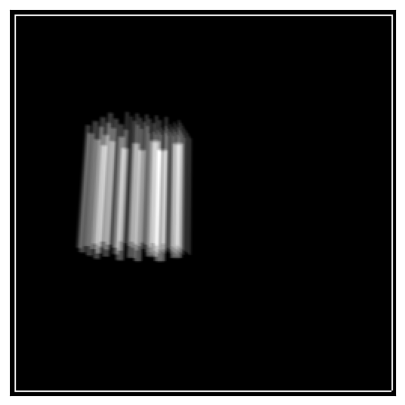

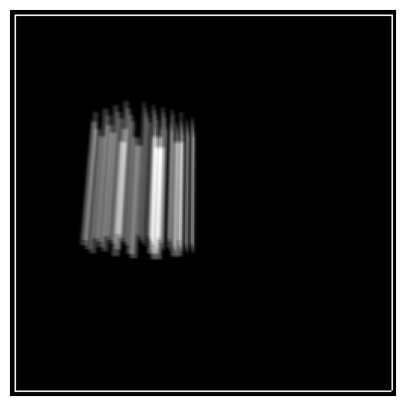

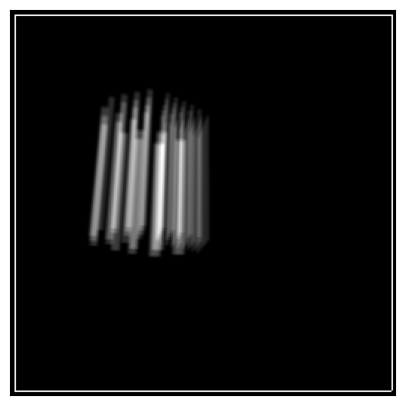

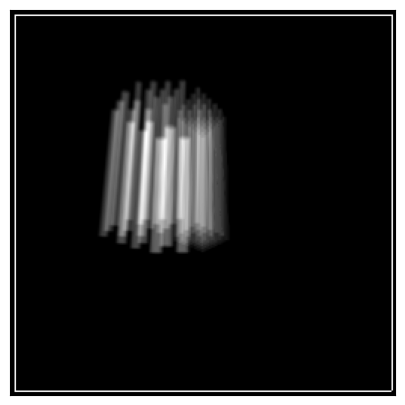

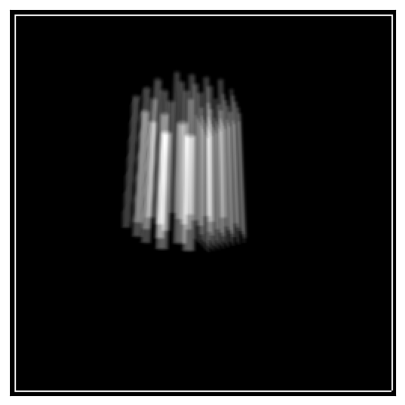

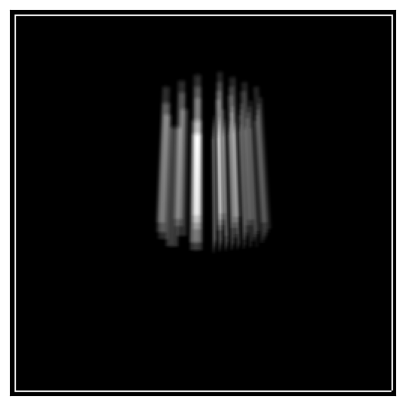

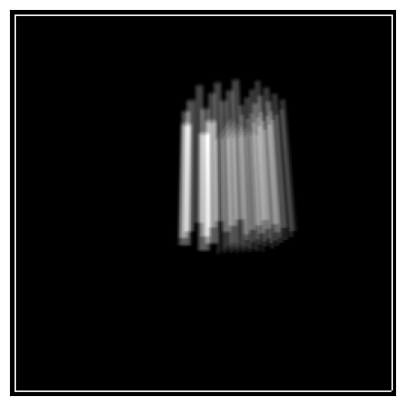

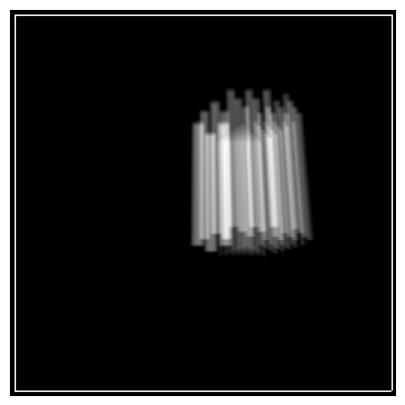

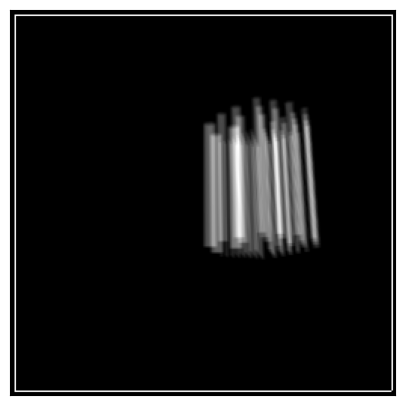

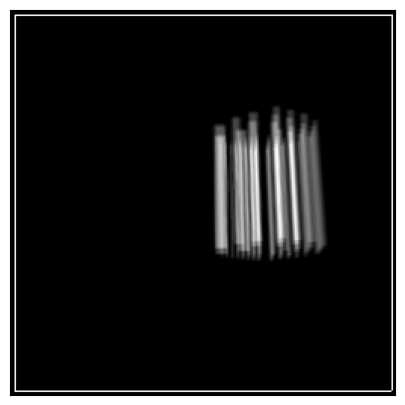

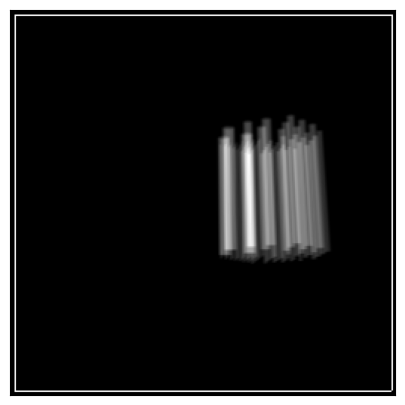

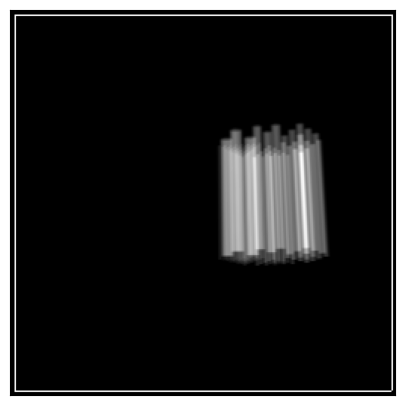

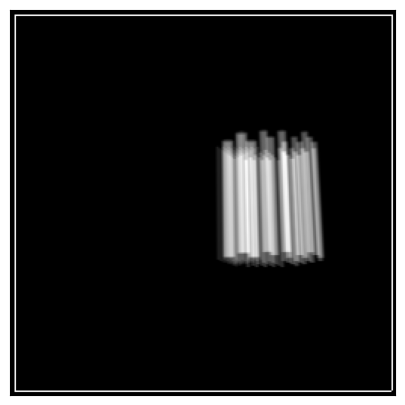

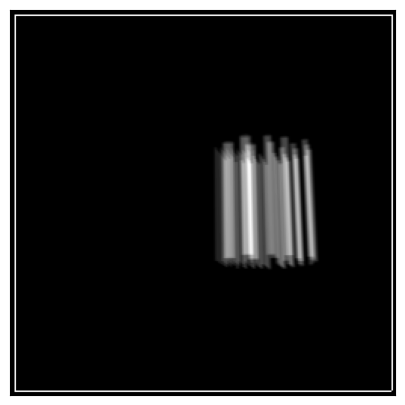

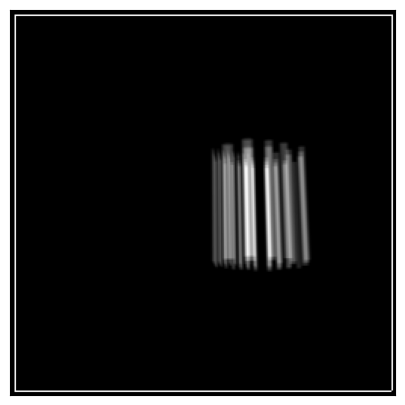

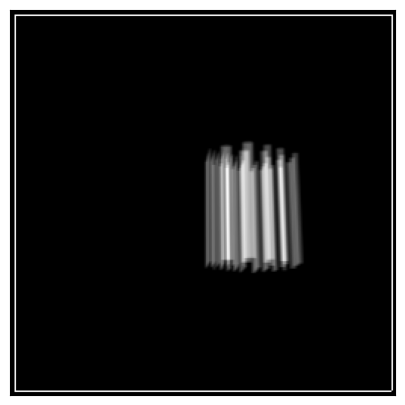

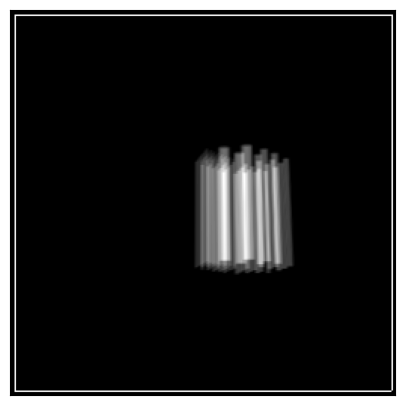

ic| img.shape: torch.Size([1, 1, 256, 256])


torch.Size([1, 1, 256, 256])

In [43]:
#Collect Pseudosinogram for central Z slice

Sinogram0=np.zeros([256,24])
Projections=torch.zeros([24,256,256])

for imod in range(0,20):
  drr = DRR(
    volume,  # The CT volume as a numpy array
    spacing,  # Voxel dimensions of the CT
    sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
    height=256,  # Height of the DRR (if width is not seperately provided, the generated image is square)
    delx=2.0,  # Pixel spacing (in mm)
  ).to(device)

  # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
  rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
  translations = torch.tensor([[bx, by, bz]], device=device)
  img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")

  Projections[imod,:,:]=img[0,0,:,:]
  Sinogram0[:,imod]=img[0,0,125,:].cpu()

  imgMax=img.max()
  img[0,0,3:253,3] = imgMax
  img[0,0,3:253,253] = imgMax
  img[0,0,3,3:253] = imgMax
  img[0,0,253,3:253] = imgMax
  plot_drr(img, ticks=False)
  plt.show()

ic(img.shape)

Display Pseudosinogram for central Z slice

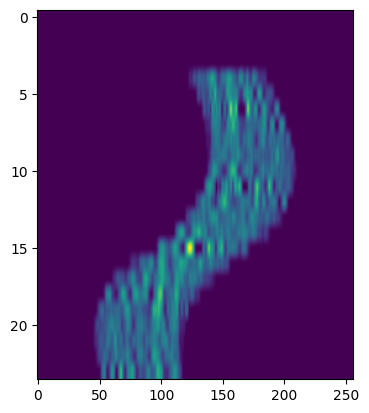

In [44]:
ThisAspect=250./20.
plt.imshow(np.flipud(Sinogram0.T),aspect=ThisAspect)

Extrapolate to (approximate) missing angles using (approximate) complementary angles

ic| Projections.shape: torch.Size([24, 256, 256])
ic| Sinogram0.shape: (256, 24)
ic| CompProj.shape: torch.Size([256, 256])
ic| CompProj.shape: (256, 256)
ic| CompProj.shape: torch.Size([256, 256])
ic| CompProj.shape: (256, 256)
ic| CompProj.shape: torch.Size([256, 256])
ic| CompProj.shape: (256, 256)
ic| CompProj.shape: torch.Size([256, 256])
ic| CompProj.shape: (256, 256)


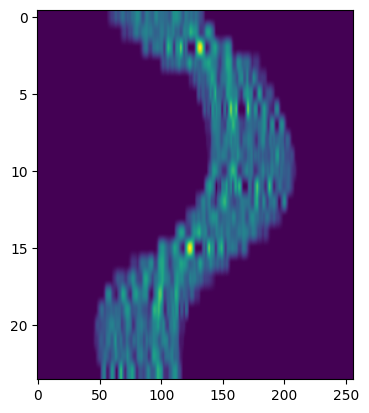

In [45]:
ic(Projections.shape)
ic(Sinogram0.shape)
for imod in range(20,24):
  CompProj=torch.flip(Projections[imod-13,:,:],[1])
  Projections[imod,:,:]=CompProj
  ic(CompProj.shape)
  CompProj=CompProj.detach().cpu().numpy()
  ic(CompProj.shape)
  #Sinogram0[:,imod]=img[0,0,125,:].cpu()
  Sinogram0[:,imod]=CompProj[125,:]

ThisAspect=250./20.
plt.imshow(np.flipud(Sinogram0.T),aspect=ThisAspect)

Save Projections for single instance to

See https://pytorch.org/docs/stable/generated/torch.save.html


From https://stackoverflow.com/questions/10016352/convert-numpy-array-to-tuple

In [46]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

In [47]:
#array = np.array(((2,2),(2,-2)))
Tuple1= totuple(TranslatePhantom)
ic(Tuple1)
Tuple2= totuple(RotatePhantom)
ic(Tuple2)

ic| Tuple1: (40.0, 20.0, 0.0)
ic| Tuple2: (0.0, 0.0, 0.0)


(0.0, 0.0, 0.0)

# Save to file
x = torch.tensor([0, 1, 2, 3, 4])
torch.save(Projections, 'Projections0.pt')
# Save to io.BytesIO buffer
buffer = io.BytesIO()
torch.save(Projections, buffer)

Compact FOV Display for all 80 modules

ic| img.shape: torch.Size([1, 1, 256, 256])
/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
ic| BigImage.shape: torch.Size([4, 256, 24, 256])
ic| BigImage.shape: torch.Size([4, 256, 24, 256])
ic| BigImage.shape: torch.Size([1, 1, 1024, 6144])


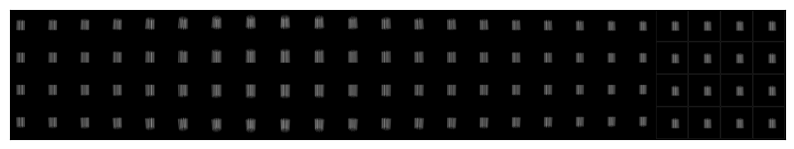

ic| img.shape: torch.Size([1, 1, 256, 256])


torch.Size([1, 1, 256, 256])

In [48]:
#BigImage=torch.zeros(4,256,24,256)
ic(img.shape)
BigImage=img.tile(4,24).resize(4,256,24,256)
ic(BigImage.shape)

for iRow in range(0,4):
  for iCol in range(0,20):
    imod=iRow*20+iCol

    drr = DRR(
        volume,  # The CT volume as a numpy array
        spacing,  # Voxel dimensions of the CT
        sdr=float(vsdr[imod]),  # Source-to-detector radius (half of the source-to-detector distance)
        height=256,  # Height of the DRR (if width is not seperately provided, the generated image is square)
        delx=2.0,  # Pixel spacing (in mm)
          ).to(device)

    # Set the camera pose with rotations (yaw, pitch, roll) and translations (x, y, z)
    rotations = torch.tensor([[float(alpha[imod]), float(beta[imod]), torch.pi / 2]], device=device)
    translations = torch.tensor([[bx, by, bz]], device=device)
    img = drr(rotations, translations, parameterization="euler_angles", convention="ZYX")
    #imgMax=img.max()
    #img[0,0,3:253,3] = imgMax
    #img[0,0,3:253,253] = imgMax
    #img[0,0,3,3:253] = imgMax
    #img[0,0,253,3:253] = imgMax
    BigImage[iRow,:,iCol,:]=img[0,0,:,:]

ic(BigImage.shape)
BigImage=BigImage.reshape(1,1,1024,6144)
ic(BigImage.shape)
plot_drr(BigImage, ticks=False)
plt.show()

ic(img.shape)

#Use Pytomography to get Radon Transforms

https://pytomography.readthedocs.io/en/latest/notebooks/t_fbp.html

In [49]:
#!pip install scipy==1.9.1

##Filtered Back Projection
We’ll use the classes of PyTomography to implement filtered back projection in SPECT.

In [50]:
from pytomography.algorithms import FilteredBackProjection
from pytomography.projectors.SPECT import SPECTSystemMatrix
from pytomography.metadata import SPECTObjectMeta, SPECTProjMeta
from pytomography.transforms.SPECT import SPECTAttenuationTransform, SPECTPSFTransform
from pytomography.utils import HammingFilter
import numpy as np
import matplotlib.pyplot as plt
import torch
from pytomography.io.SPECT import dicom

##Creating The Derenzo Object

Derenzo Object: a derenzo-like phantom in object space:

In [51]:
ic(PVCvolume.shape)
ic(spacing)

ic| PVCvolume.shape: (512, 512, 96)
ic| spacing: [0.703125, 0.703125, 2.5]


[0.703125, 0.703125, 2.5]

In [52]:
#xlinspace=np.linspace(-256*spacing[0], 256*spacing[0], 512)
#ylinspace=np.linspace(-256*spacing[1], 256*spacing[1], 512)
#zlinspace=np.linspace(-66.5*spacing[2], 66.5*spacing[2], 133)
xHalf=(PVCvolume.shape[0]/2.)*spacing[0]
x = torch.linspace(-xHalf, xHalf, PVCvolume.shape[0])
yHalf=(PVCvolume.shape[1]/2.)*spacing[1]
y = torch.linspace(-yHalf, yHalf, PVCvolume.shape[1])
zHalf=(PVCvolume.shape[2]/2.)*spacing[2]
z = torch.linspace(-zHalf, zHalf, PVCvolume.shape[2])
xv, yv, zv = torch.meshgrid([x,y,z], indexing='ij')
object_truth = torch.from_numpy(PVCvolume)
object_truthFull = object_truth.unsqueeze(dim=0) # add batch dimension
ic(object_truthFull.shape)

from scipy.ndimage import zoom
object_truth=torch.from_numpy(zoom(object_truthFull.numpy(), (1, 0.5, 0.5, 1)))
ic(object_truth.shape)

ic| object_truthFull.shape: torch.Size([1, 512, 512, 96])
ic| object_truth.shape: torch.Size([1, 256, 256, 96])


torch.Size([1, 256, 256, 96])

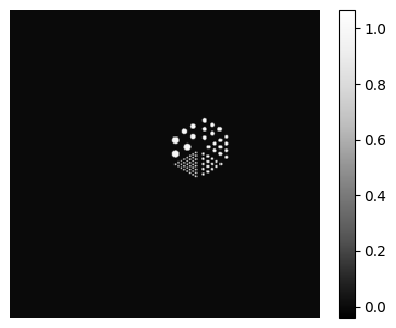

In [53]:
plt.figure(figsize=(5,4))
plt.pcolormesh(np.squeeze(object_truth[0][:,:,48]), cmap='Greys_r')
plt.axis('off')
plt.colorbar()

# 96 Projections Sparse Angle Case

We also need to create metadata that accompanies this image. In this case, we’ll assume the voxel sizes are 0.7mm. For our projection space, we’ll assume 80 projections are taken at angular spacing of 360/96 degrees. We’ll assume an acquisition radius of 50 cm

In [54]:
angleStep= 360./96.
angles = np.arange(0,360.,angleStep)
ic(angles.shape)
radii = 50 * np.ones(len(angles))
ic(radii.shape)
ic(object_truth[0].shape)
object_meta = SPECTObjectMeta(dr=(spacing[0],spacing[1],spacing[2]), shape=object_truth[0].shape)
ic(object_truth[0,0].shape)
proj_meta = SPECTProjMeta(projection_shape=object_truth[0,0].shape, angles=angles, radii=radii)
ic(object_truthFull[0].shape)
ic(object_truthFull[0,0].shape)
proj_metaFull = SPECTProjMeta(projection_shape=object_truthFull[0,0].shape, angles=angles, radii=radii)


ic| angles.shape: (96,)
ic| radii.shape: (96,)
ic| object_truth[0].shape: torch.Size([256, 256, 96])
ic| object_truth[0,0].shape: torch.Size([256, 96])
ic| object_truthFull[0].shape: torch.Size([512, 512, 96])
ic| object_truthFull[0,0].shape: torch.Size([512, 96])


##Modeling the Imaging System

We’ll model two different imaging systems here: an idealized imaging system, and a true SPECT imaging system. We’ll show that filtered back projection reconstruction only performs well for the idealized system and not for the true SPECT system. The two systems are

An idealized imaging system characterized by the radon transform. In this case
 is simply a projection operator.

Representative of a true SPECT imaging system, with attenuation/PSF modeling. In this case,
 is more complicated.

We’ll neglect scatter for now (equivalent to assuming perfect scatter correction). We’ll show that while filtered back projection does a good job at reconstructing (1), its unable to account for attenuation/PSF modeling in (2)

Case 1:
Our idealized imaging system is simply a SPECT imaging system without attenuation/PSF effects

In [55]:
system_matrix_radon = SPECTSystemMatrix(
    obj2obj_transforms=[],
    proj2proj_transforms=[],
    object_meta=object_meta,
    proj_meta=proj_meta)

Case 2:
We’ll start by creating an attenuation map representative of water with photons at an energy of 140keV (
 at this energy for water)

Obtaining Imaging Data
We can now use the forward method of system_matrix to model
 (convert the object
 into an image
) for the case of the radon transform

In [56]:
amap = (xv>-0.2)*(xv<0.2)*(yv>-0.15)*(yv<0.15)*(zv>-0.1)*(zv<0.1)
amap = amap.to(torch.float).unsqueeze(0) * 0.15
att_transform = SPECTAttenuationTransform(amap)

We’ll assume imaging using Siemens medium energy collimators

In [57]:
collimator_name = 'SY-ME'
energy_kev = 140
psf_meta = dicom.get_psfmeta_from_scanner_params(collimator_name, energy_kev)
psf_transform = SPECTPSFTransform(psf_meta)

Now we can create our system matrix that models the SPECT imaging system

In [58]:
system_matrix_SPECT = SPECTSystemMatrix(
    obj2obj_transforms=[att_transform, psf_transform],
    proj2proj_transforms=[],
    object_meta=object_meta,
    proj_meta=proj_metaFull)

## Obtaining Imaging Data

We can now use the forward method of system_matrix to model
 (convert the object
 into an image
) for the case of (i) the radon transform and (ii) the SPECT system

In [59]:
proj_radon = system_matrix_radon.forward(object_truth)
#proj_SPECT = system_matrix_SPECT.forward(object_truthFull)

We can look at a projection at 18.75 degrees increments for example:

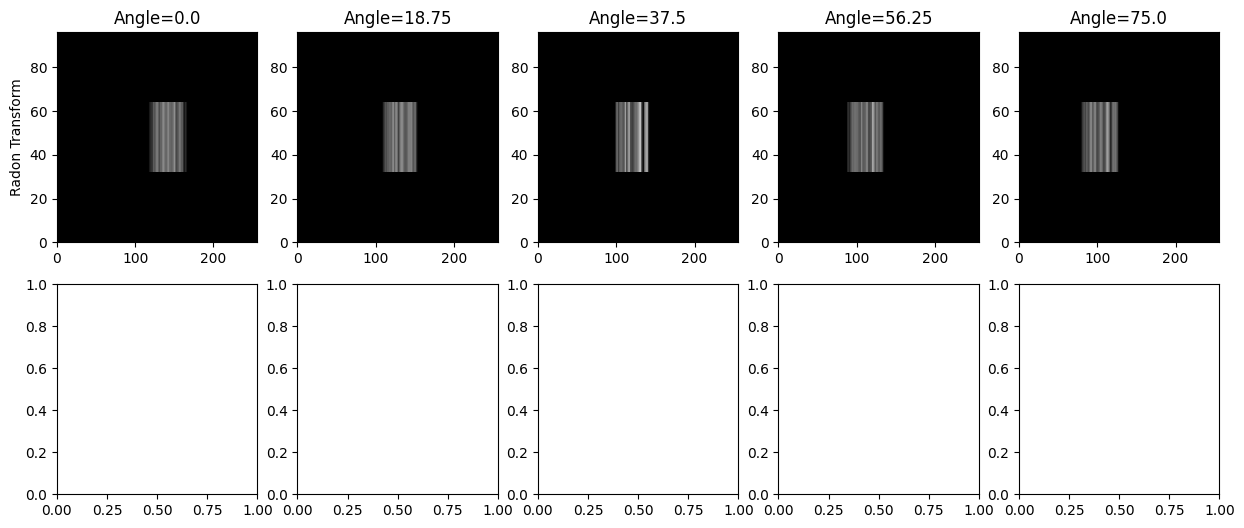

In [60]:
fig, axes = plt.subplots(2,5,figsize=(15,6))
for i, proj_idx in enumerate([0,5,10,15,20]):
    axes[0,i].pcolormesh(proj_radon.cpu()[0][proj_idx].T, cmap='Greys_r', vmax=25)
    axes[0,i].set_title(f'Angle={proj_meta.angles[proj_idx]}')
    #axes[1,i].pcolormesh(proj_SPECT.cpu()[0][proj_idx].T, cmap='Greys_r', vmax=25)
axes[0,0].set_ylabel('Radon Transform')
#axes[1,0].set_ylabel('SPECT System')
plt.show()

Note that the SPECT system yields an image with less counts (due to attenuation) and is blurrier (due to PSF modeling)

Reconstruction
Filtered back projection is implemented through the FilteredBackProjection class

In [61]:
def filtered_back_projection(proj):
    fbp = FilteredBackProjection(proj, angles)
    object_prediction = fbp()
    return object_prediction

Now we can try reconstructing both the radon transform system and the idealized SPECT system

In [62]:
object_radon_fbp_prediction = filtered_back_projection(proj_radon)
#object_SPECT_fbp_prediction = filtered_back_projection(proj_SPECT)

And we can plot the central axial slice of each reconstruction

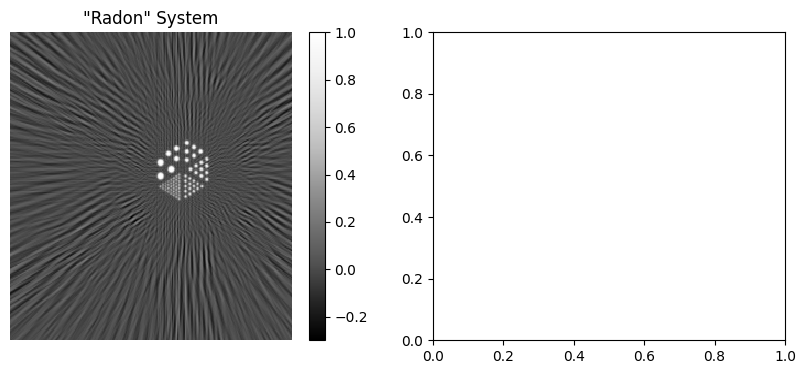

In [63]:
central_slice_radon = np.squeeze(object_radon_fbp_prediction.cpu()[0][:,:,48])
#central_slice_SPECT = np.squeeze(object_SPECT_fbp_prediction.cpu()[0][:,:,48])

plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.pcolormesh(central_slice_radon, cmap='Greys_r', vmax=1)
plt.axis('off')
plt.title('"Radon" System')
plt.colorbar()
#plt.subplot(122)
#plt.pcolormesh(central_slice_SPECT, cmap='Greys_r', vmax=1)
#plt.axis('off')
#plt.title('SPECT System')
#plt.colorbar()
plt.show()

Look at image objects

In [64]:
ic(object_truth.shape)
ic(object_radon_fbp_prediction.shape)

ic| object_truth.shape: torch.Size([1, 256, 256, 96])
ic| object_radon_fbp_prediction.shape: torch.Size([1, 256, 256, 96])


torch.Size([1, 256, 256, 96])

Look at sparse angle projection objects

In [65]:
proj96_radon=proj_radon
#proj96_SPECT=proj_SPECT

ic(proj96_radon.shape)
#ic(proj96_SPECT.shape)

ic| proj96_radon.shape: torch.Size([1, 96, 256, 96])


torch.Size([1, 96, 256, 96])

Match size and shape of BigImage

plot_drr(proj96_radon[, ticks=False)

ic| proj96_radon.shape: torch.Size([1, 96, 256, 96])
ic| FullRadonImage.shape: (96, 256, 96)
ic| CropRadonImage.shape: (96, 256, 96)
ic| ZoomRadonImage.shape: (96, 256, 256)
ic| ZoomRadonImage.shape: (24, 4, 256, 256)
ic| ReshapeRadonImage.shape: (4, 24, 256, 256)
ic| PermuteRadonImage.shape: (4, 256, 24, 256)


[<Axes: >]

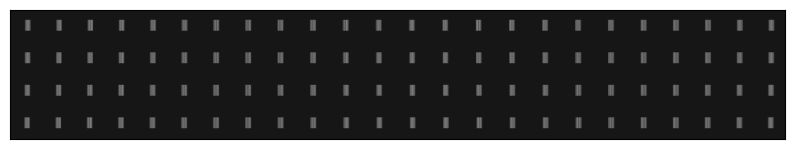

In [66]:
from scipy.ndimage import zoom

ic(proj96_radon.shape)
FullRadonImage=np.squeeze(proj96_radon.cpu().numpy())
ic(FullRadonImage.shape)
CropRadonImage=FullRadonImage[:,:,:]
ic(CropRadonImage.shape)
ZoomRadonImage=zoom(CropRadonImage, (1, 1, 2.6667))
ic(ZoomRadonImage.shape)
ZoomRadonImage=ZoomRadonImage.reshape([24,4,256,256])
ic(ZoomRadonImage.shape)
ReorderRadonImage=np.zeros([96,256,256])
for iRow in range(0,4):
  for iColumn in range(0,24):
    iIndex=iColumn+(iRow*24)
    ReorderRadonImage[iIndex,:,:]=ZoomRadonImage[iColumn,iRow,:,:]

ReshapeRadonImage=ReorderRadonImage.reshape([4,24,256,256])
ic(ReshapeRadonImage.shape)
PermuteRadonImage=ReshapeRadonImage.transpose([0,3,1,2])
ic(PermuteRadonImage.shape)
BigRadonImage=torch.from_numpy(PermuteRadonImage.reshape(1,1,1024,6144))

plot_drr(BigRadonImage, ticks=False)

Compare BigImage

ic| BigImage.shape: torch.Size([1, 1, 1024, 6144])
ic| BigImage.shape: torch.Size([1, 1, 1024, 6144])


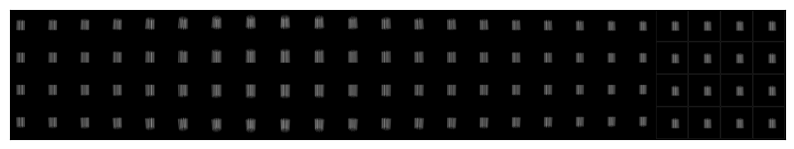

ic| img.shape: torch.Size([1, 1, 256, 256])


torch.Size([1, 1, 256, 256])

In [67]:
#BigImage.shape: torch.Size([4, 256, 24, 256])
ic(BigImage.shape)
BigImage=BigImage.reshape(1,1,1024,6144)
ic(BigImage.shape)
plot_drr(BigImage, ticks=False)
plt.show()

ic(img.shape)

# 720 Projections Full Angle Case

We also need to create metadata that accompanies this image. In this case, we’ll assume the voxel sizes are 0.4 cm. For our projection space, we’ll assume 80 projections are taken at angular spacing of 7.5 degrees. We’ll assume an acquisition radius of 50 cm

In [68]:
angles = np.arange(0,360.,0.5)
ic(angles.shape)
radii = 50 * np.ones(len(angles))
#ic(radii)
object_meta = SPECTObjectMeta(dr=(0.4,0.4,0.4), shape=object_truth[0].shape)
proj_meta = SPECTProjMeta(projection_shape=object_truth[0,0].shape, angles=angles, radii=radii)

ic| angles.shape: (720,)


##Modeling the Imaging System

We’ll model two different imaging systems here: an idealized imaging system, and a true SPECT imaging system. We’ll show that filtered back projection reconstruction only performs well for the idealized system and not for the true SPECT system. The two systems are

An idealized imaging system characterized by the radon transform. In this case
 is simply a projection operator.

Representative of a true SPECT imaging system, with attenuation/PSF modeling. In this case,
 is more complicated.

We’ll neglect scatter for now (equivalent to assuming perfect scatter correction). We’ll show that while filtered back projection does a good job at reconstructing (1), its unable to account for attenuation/PSF modeling in (2)

Case 1:
Our idealized imaging system is simply a SPECT imaging system without attenuation/PSF effects

In [69]:
system_matrix_radon = SPECTSystemMatrix(
    obj2obj_transforms=[],
    proj2proj_transforms=[],
    object_meta=object_meta,
    proj_meta=proj_meta)

Case 2:
We’ll start by creating an attenuation map representative of water with photons at an energy of 140keV (
 at this energy for water)

Obtaining Imaging Data
We can now use the forward method of system_matrix to model
 (convert the object
 into an image
) for the case of the radon transform

In [70]:
amap = (xv>-0.2)*(xv<0.2)*(yv>-0.15)*(yv<0.15)*(zv>-0.1)*(zv<0.1)
amap = amap.to(torch.float).unsqueeze(0) * 0.15
att_transform = SPECTAttenuationTransform(amap)

We’ll assume imaging using Siemens medium energy collimators

In [71]:
collimator_name = 'SY-ME'
energy_kev = 140
psf_meta = dicom.get_psfmeta_from_scanner_params(collimator_name, energy_kev)
psf_transform = SPECTPSFTransform(psf_meta)

Now we can create our system matrix that models the SPECT imaging system

In [72]:
system_matrix_SPECT = SPECTSystemMatrix(
    obj2obj_transforms=[att_transform, psf_transform],
    proj2proj_transforms=[],
    object_meta=object_meta,
    proj_meta=proj_meta)

## Obtaining Imaging Data

We can now use the forward method of system_matrix to model
 (convert the object
 into an image
) for the case of (i) the radon transform and (ii) the SPECT system

In [73]:
proj_radon = system_matrix_radon.forward(object_truth)
#proj_SPECT = system_matrix_SPECT.forward(object_truth)

Note that the SPECT system yields an image with less counts (due to attenuation) and is blurrier (due to PSF modeling)

Reconstruction
Filtered back projection is implemented through the FilteredBackProjection class

In [74]:
def filtered_back_projection(proj):
    fbp = FilteredBackProjection(proj, angles)
    object_prediction = fbp()
    return object_prediction

Now we can try reconstructing both the radon transform system and the idealized SPECT system

In [75]:
object_radon_fbp_prediction = filtered_back_projection(proj_radon)
#object_SPECT_fbp_prediction = filtered_back_projection(proj_SPECT)

And we can plot the central axial slice of each reconstruction

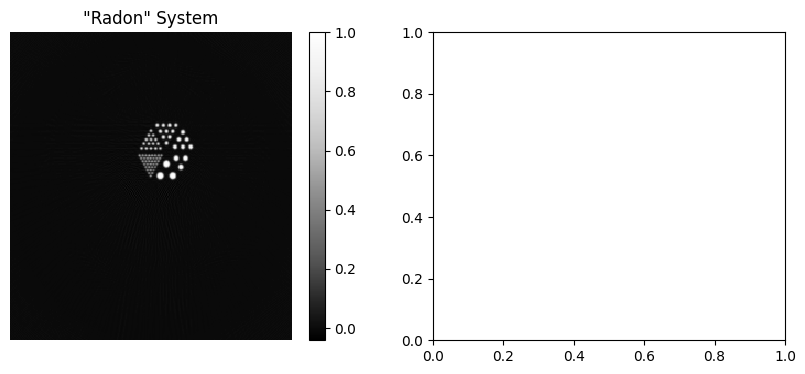

In [76]:
central_slice_radon = object_radon_fbp_prediction.cpu()[0][:,:,48].T
#central_slice_SPECT = object_SPECT_fbp_prediction.cpu()[0][:,:,48].T

plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.pcolormesh(central_slice_radon, cmap='Greys_r', vmax=1)
plt.axis('off')
plt.title('"Radon" System')
plt.colorbar()
#plt.subplot(122)
#plt.pcolormesh(central_slice_SPECT, cmap='Greys_r', vmax=1)
#plt.axis('off')
#plt.title('SPECT System')
#plt.colorbar()
plt.show()

Look at image objects

In [77]:
ic(object_truth.shape)
ic(object_radon_fbp_prediction.shape)

ic| object_truth.shape: torch.Size([1, 256, 256, 96])
ic| object_radon_fbp_prediction.shape: torch.Size([1, 256, 256, 96])


torch.Size([1, 256, 256, 96])

Look at projection objects

In [78]:
ic(proj_radon.shape)
#ic(proj_SPECT.shape)

ic| proj_radon.shape: torch.Size([1, 720, 256, 96])


torch.Size([1, 720, 256, 96])